In [3]:
from picaso import justdoit as jdi 
from picaso import justplotit as jpi

jpi.output_notebook()

Loading BokehJS ...

In [4]:
opa = jdi.opannection(wave_range=[0.3,2.2])
cldjup = jdi.inputs()
#phase 
cldjup.phase_angle(0) #radians

#gravity 

radius = 1
massj = 1 
cldjup.gravity(radius=radius, radius_unit=u.Rjup, 
            mass = massj, mass_unit=u.Mjup)

#star
cldjup.star(opa, 6000,0.0122,4.437,semi_major = 1.5, semi_major_unit = u.au) #kelvin, log metal, log cgs

#atmosphere
cldjup.atmosphere(filename= jdi.jupiter_pt(), delim_whitespace=True)

#clouds
cldjup.clouds( filename= jdi.jupiter_cld(), delim_whitespace=True)

#spectrum
df = cldjup.spectrum(opa)
wno, alb, fpfs = df['wavenumber'] , df['albedo'] , df['fpfs_reflected'] 
wno150, fpfs150 = jdi.mean_regrid(wno, fpfs, R=150)
wno50, fpfs50 = jdi.mean_regrid(wno, fpfs, R=50)
wno300, fpfs300 = jdi.mean_regrid(wno, fpfs, R=300)

In [5]:
from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter

filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
filters[3].wavelength

array([ 200. ,  200.5,  201. , ..., 1100.5, 1101. , 1101.5])

<IPython.core.display.Javascript object>


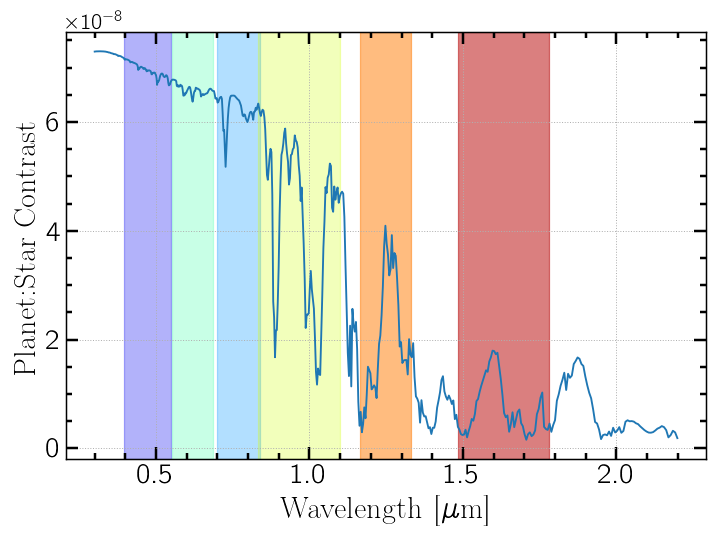

In [40]:
%matplotlib notebook
plt.plot(1e4/wno300, fpfs300)

import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')
cmap = matplotlib.cm.get_cmap('jet')

n = len(filters)
cs = np.linspace(0.1,0.95,n)
colors = cmap(cs)

for i,f in enumerate(filters[:4]):
    plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = 0.3,
               color=colors[i])
for i,f in enumerate(filters[4:]):
    plt.axvspan(f.half_max_low, f.half_max_high, alpha = 0.5,
               color=colors[i+4])

plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.ylabel('Planet:Star Contrast', fontsize=25)
plt.grid(ls=':')
plt.tight_layout()

In [27]:
z = pd.read_csv('/Users/loganpearce/Dropbox/astro_packages/myastrotools/myastrotools/filter_curves/Sloan_z.txt',
               comment='#', names=['wavelength','transmission'], delim_whitespace=True)
w = np.array(z['wavelength'])[::-1]
t = np.array(z['transmission'])[::-1]
w = np.append(w,[1100.5,1101,1101.5])
t = np.append(t,[0,0,0])
w,t

(array([ 200. ,  200.5,  201. , ..., 1100.5, 1101. , 1101.5]),
 array([-0.00106242, -0.00133747, -0.00143796, ...,  0.        ,
         0.        ,  0.        ]))

<IPython.core.display.Javascript object>


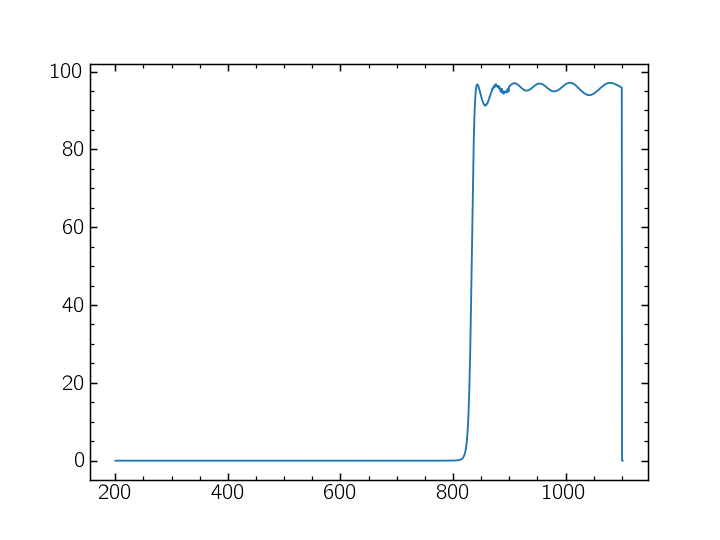

In [28]:

%matplotlib notebook
plt.plot(w,t)

In [31]:
zout = pd.DataFrame(data={'wavelength':w,'tranmission':t})
zout.to_csv('/Users/loganpearce/Dropbox/astro_packages/myastrotools/myastrotools/filter_curves/Sloan_z.txt',
           index=False, header=False, sep=' ')